# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></div><div class="lev2 toc-item"><a href="#Utility-functions" data-toc-modified-id="Utility-functions-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utility functions</a></div><div class="lev1 toc-item"><a href="#Load-Data" data-toc-modified-id="Load-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Data</a></div><div class="lev2 toc-item"><a href="#create-new-features" data-toc-modified-id="create-new-features-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>create new features</a></div><div class="lev2 toc-item"><a href="#Rename-columns" data-toc-modified-id="Rename-columns-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Rename columns</a></div><div class="lev2 toc-item"><a href="#Define-colors-for-data" data-toc-modified-id="Define-colors-for-data-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define colors for data</a></div><div class="lev2 toc-item"><a href="#Data-exploration-:-Distributions" data-toc-modified-id="Data-exploration-:-Distributions-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data exploration : Distributions</a></div><div class="lev2 toc-item"><a href="#Data-exploration-:-Violinplots/Boxplots" data-toc-modified-id="Data-exploration-:-Violinplots/Boxplots-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data exploration : Violinplots/Boxplots</a></div><div class="lev2 toc-item"><a href="#Data-exploration-:-Pair-plots" data-toc-modified-id="Data-exploration-:-Pair-plots-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Data exploration : Pair plots</a></div><div class="lev1 toc-item"><a href="#Preprocess-data-and-test-classifiers" data-toc-modified-id="Preprocess-data-and-test-classifiers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocess data and test classifiers</a></div><div class="lev2 toc-item"><a href="#Define-all-classfiers" data-toc-modified-id="Define-all-classfiers-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Define all classfiers</a></div><div class="lev2 toc-item"><a href="#Scenario-1:-Only-scalar-valued-features" data-toc-modified-id="Scenario-1:-Only-scalar-valued-features-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Scenario 1: Only scalar valued features</a></div><div class="lev2 toc-item"><a href="#Test-2:-Only-categorical-features-(X,n,Y,m,-charge)" data-toc-modified-id="Test-2:-Only-categorical-features-(X,n,Y,m,-charge)-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Test 2: Only categorical features (X,n,Y,m, charge)</a></div><div class="lev2 toc-item"><a href="#Test-3:-All-features" data-toc-modified-id="Test-3:-All-features-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Test 3: All features</a></div><div class="lev2 toc-item"><a href="#Decision-surfaces" data-toc-modified-id="Decision-surfaces-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decision surfaces</a></div>

# Libraries

In [23]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# Import datasets, classifiers and performance metrics
from sklearn import metrics
from sklearn import cross_validation
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from awesome_utils import *


awesome_settings()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


## Utility functions

In [2]:
def report_classification(X,y,features,names, classifiers):
    print('X shape: ',X.shape)
    print('y shape: ',y.shape)
    print("Global: ",sum(y==0))
    print("Local : ",sum(y==1))
    print("Features:",', '.join(features))
    print("== Classifier performance ==")
    print("%20s --%5s (%5s)"%("Algorithm","Mean","Std"))
    cv =  cross_validation.StratifiedKFold(y, n_folds=10)
    for name, clf in zip(names, classifiers):
        scores = cross_validation.cross_val_score(clf,X,y,cv=cv)
        print("%20s = %2.3f (%2.3f)"%(name,np.mean(scores),np.std(scores)))
    print("== Feature Importance ==")
    df = pd.DataFrame(columns=('Features', 'Importance'))
    clf = RandomForestClassifier()
    clf = clf.fit(X, y)
    for indx,f in enumerate(features):
        df.loc[len(df)] = [f,clf.feature_importances_[indx]*100]
    df.sort_values('Importance', ascending=True,inplace=True)
    for indx,row in df.iterrows():
        print("%15s = %2.2f %%"%(row['Features'],row['Importance']))
    sns.barplot(x='Features',y='Importance',data=df, palette="BuGn_d")
    plt.xticks( rotation='vertical')
    sns.despine()
    plt.ylim([0,100])
    
    return

# Load Data
 Expecting an excel 

In [72]:
df = pd.read_excel('data/ptCs_Data.xlsx')
df.drop('Note',axis=1,inplace=True)
n_class =len(set(df['Type']))
print(df.shape)
df.head()

(401, 7)


Mol  q(C) (|e|)  Total C WBI  C 2pz NAO occupancies (|e|)   gap(eV)  \
0  CAl2Ga2-2    -2.55595       2.3696                      1.48229  2.676240   
1  CAl2In2-2    -2.55296       2.3497                      1.46742  2.148883   
2  CAl2Sn2+0    -2.53945       2.3928                      1.48755  2.859644   
3   CAl3Bi+0    -2.39792       2.4606                      1.34753  1.838401   
4   CAl3Ga-2    -2.61516       2.2936                      1.49296  2.682226   

   Volume (A^3)    Type  
0      0.491369  Global  
1      0.458360  Global  
2      0.544621  Global  
3      0.304527  Global  
4      0.500101  Global

## create new features

Assuming mol is in the form $CX_mY_n\;charge$, we partition this column into several.

In [73]:
def is_integer(s):
    try:
        int(s) 
    except ValueError:
        return False
    return True

def XmYnCharge(row):
    mol =row['Mol'][1:]
    # figure out X
    X=''
    for a in atom_list:
        indx = mol.find(a)
        if indx == 0:
            if len(a) > len(X):
                X=a
    nchars=len(X)
    mol=mol[nchars:]
    # figure out m
    if is_integer(mol[0]):
        m=int(mol[0])
        mol=mol[1:]
    else:
        m=1
    # figure out Y
    Y=''
    for a in atom_list:
        indx = mol.find(a)
        if indx == 0:
            if len(a) > len(Y):
                Y=a
    nchars=len(Y)
    mol=mol[nchars:]
    # figure out n
    if is_integer(mol[0]):
        n=int(mol[0])
        mol=mol[1:]
    else:
        n=1
    # charge
    charge=int(mol)
    
    return pd.Series([X,m,Y,n,charge])


In [74]:
df[['X','m','Y','n','charge']]=df.apply(XmYnCharge,axis=1)
df.head(1)

Mol  q(C) (|e|)  Total C WBI  C 2pz NAO occupancies (|e|)  gap(eV)  \
0  CAl2Ga2-2    -2.55595       2.3696                      1.48229  2.67624   

   Volume (A^3)    Type   X  m   Y  n  charge  
0      0.491369  Global  Al  2  Ga  2      -2

## Rename columns

In [75]:
df.rename(columns={'q(C) (|e|)': 'q(C)', 'Total C WBI': 'C_WBI',
                  'C 2pz NAO occupancies (|e|)':'NAO_occ','gap(eV)':'gap',
                   'Volume (A^3)':'volume'
                  }, inplace=True)
df.head(1)

Mol     q(C)   C_WBI  NAO_occ      gap    volume    Type   X  m   Y  \
0  CAl2Ga2-2 -2.55595  2.3696  1.48229  2.67624  0.491369  Global  Al  2  Ga   

   n  charge  
0  2      -2

## Define colors for data

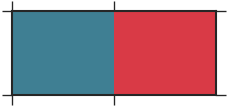

In [124]:
pal = sns.diverging_palette(220,10, sep=80, n=2)
sns.palplot(pal)

## Data exploration : Distributions

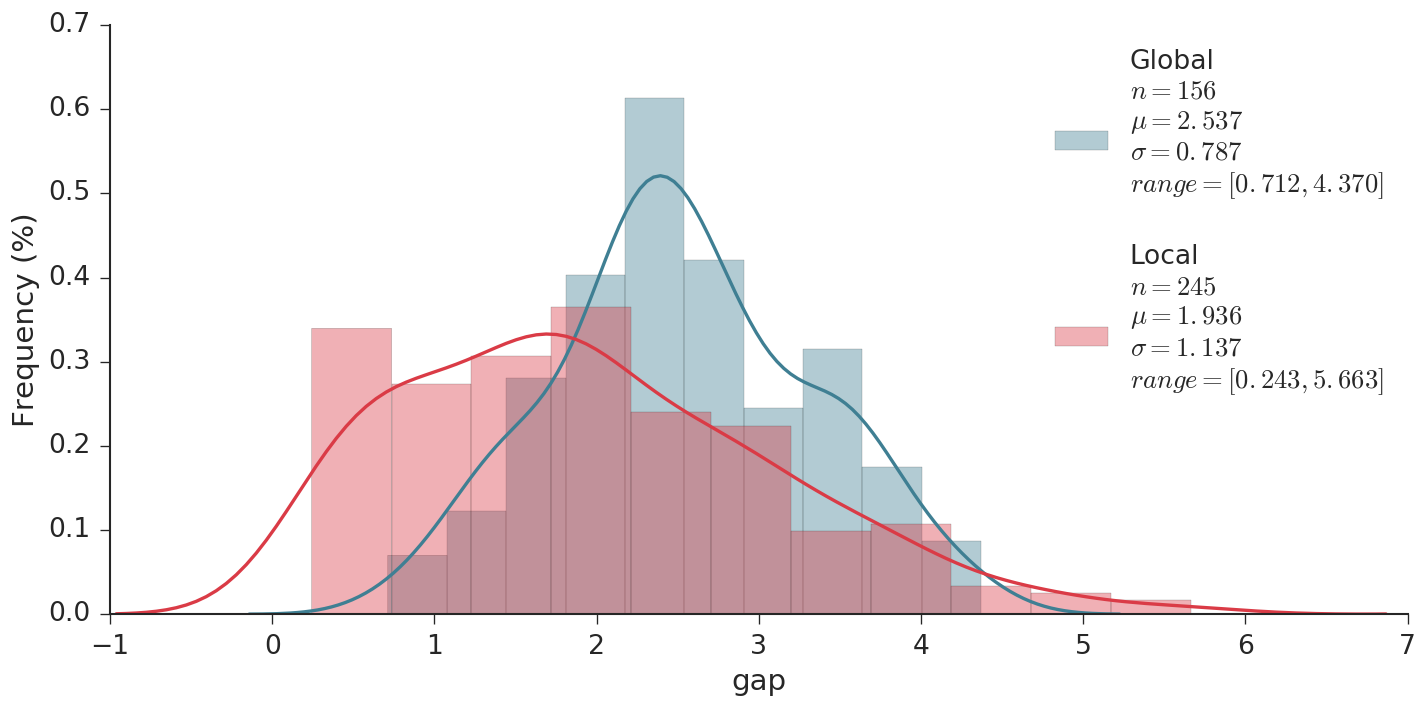

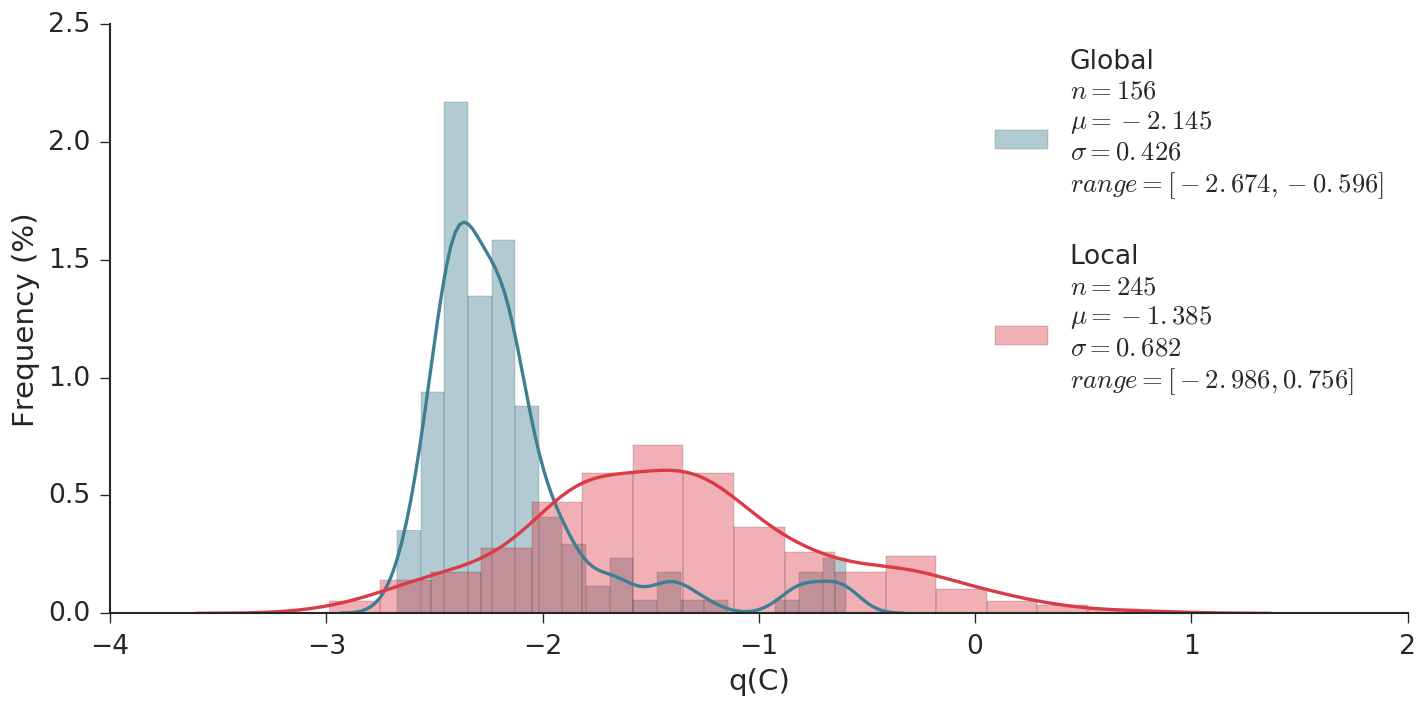

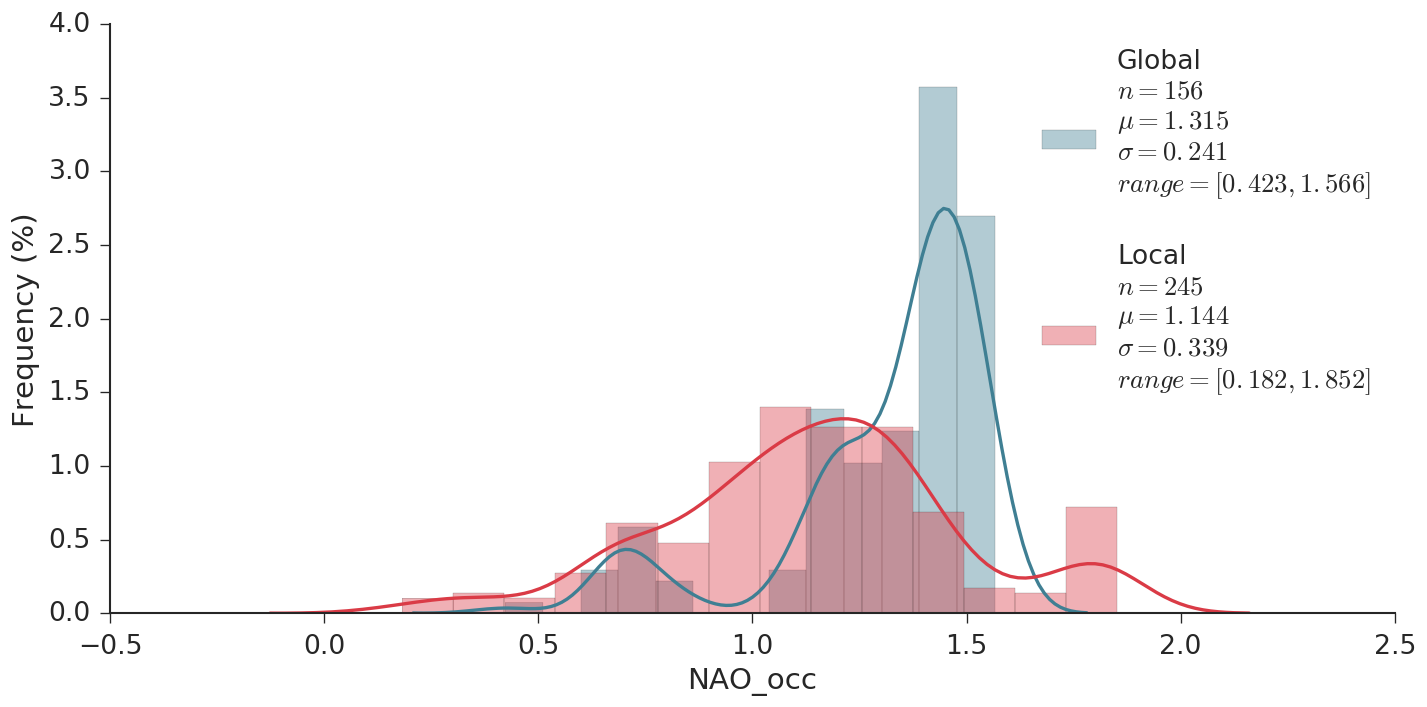

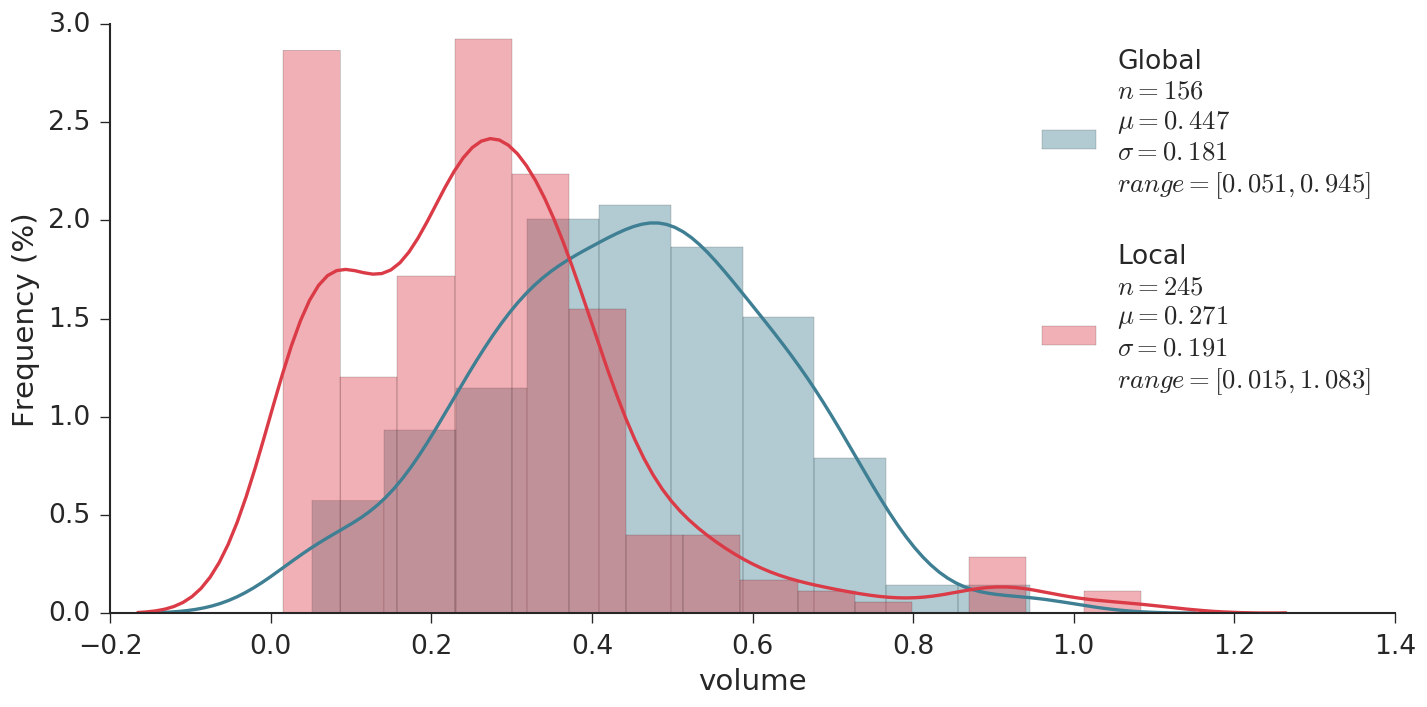

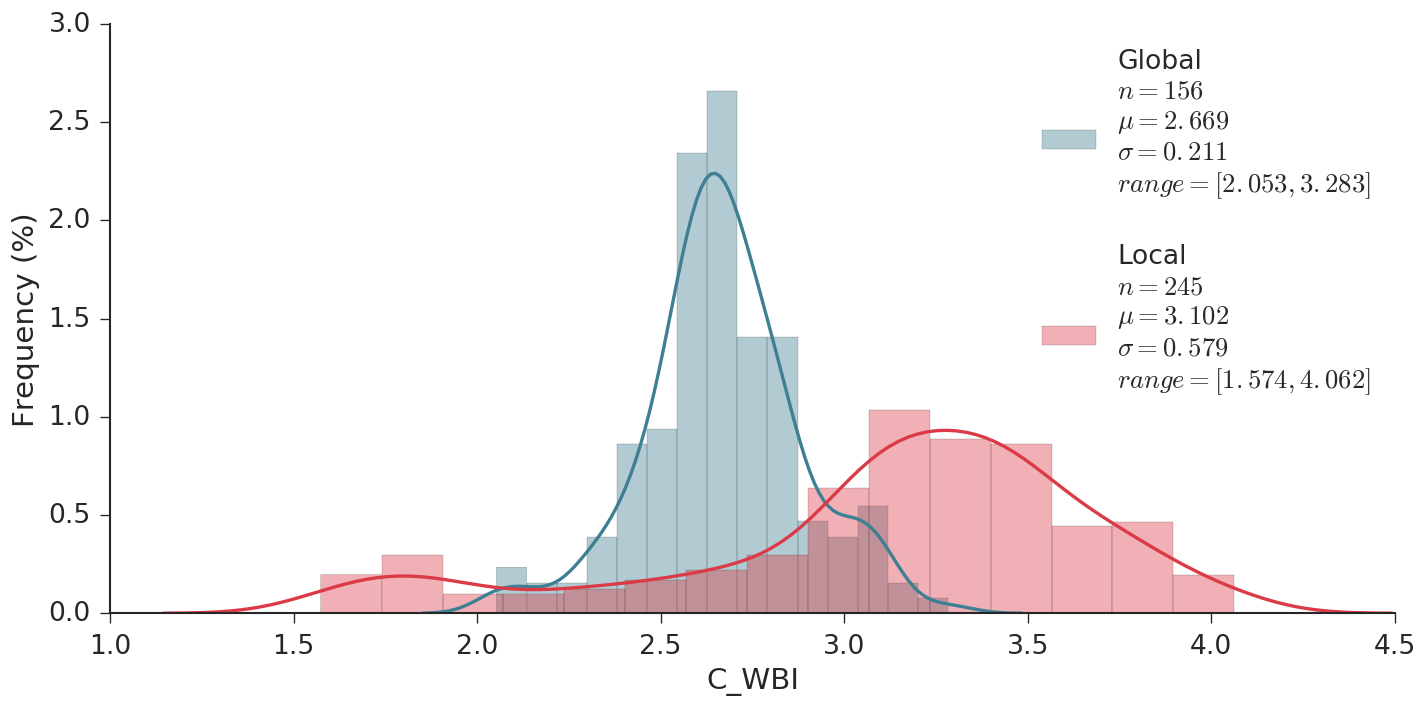

In [137]:
for i in ['gap','q(C)','NAO_occ','volume','C_WBI']:
    plt.figure(figsize=(12,6))
    for indj,j in enumerate(['Global','Local']):
        sub_df = df[df['Type']==j][i]
        label='{}\n'.format(j)
        label+='$n={}$\n'.format(len(sub_df))
        label+='$\mu=%2.3f$\n'%(np.mean(sub_df))
        label+='$\sigma=%2.3f$\n'%(np.std(sub_df))
        label+='$range=[%2.3f,%2.3f]$\n'%(np.min(sub_df),np.max(sub_df))

        sns.distplot(sub_df,label=label,
                     hist_kws={'color':pal[indj]},kde_kws={'color':pal[indj]})
    plt.ylabel('Frequency (%)')
    sns.despine(trim=True)
    plt.legend(loc='best')
    save_result('{}_distribution'.format(i))
    plt.show()

## Data exploration : Violinplots/Boxplots

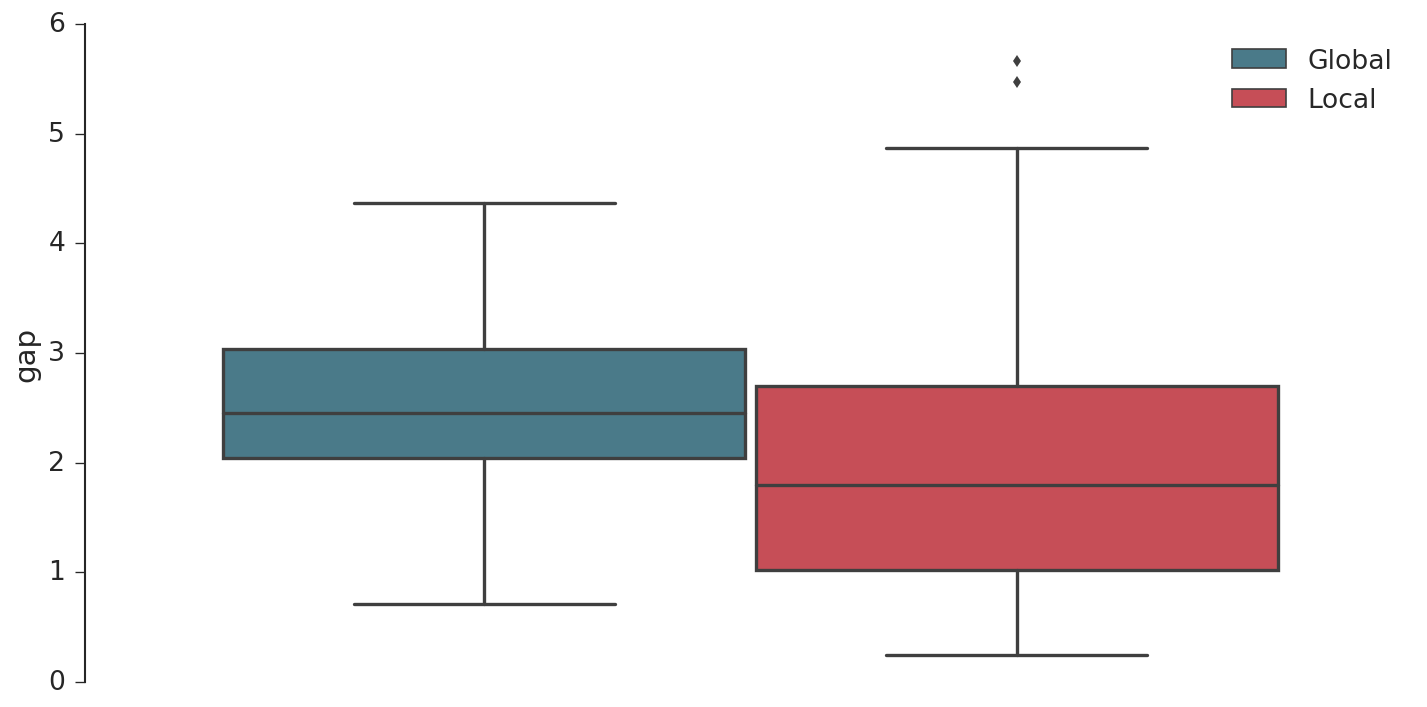

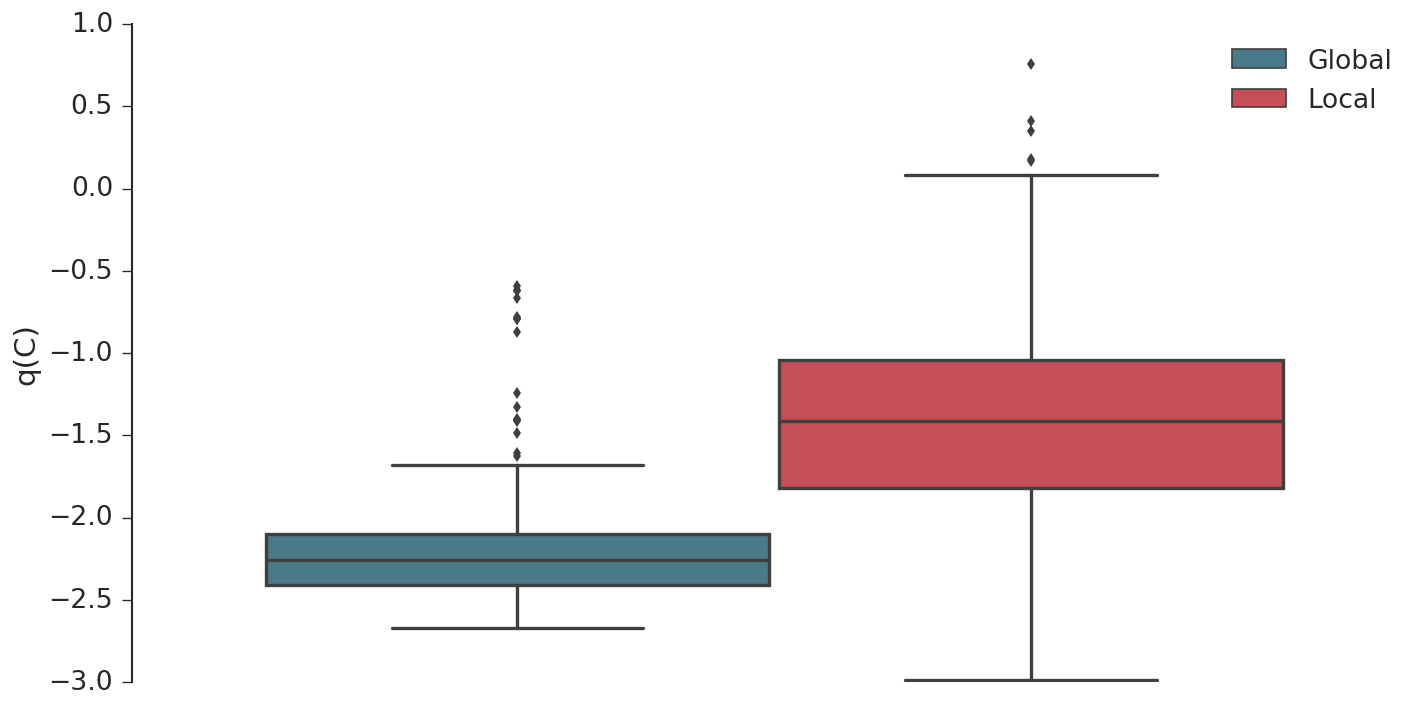

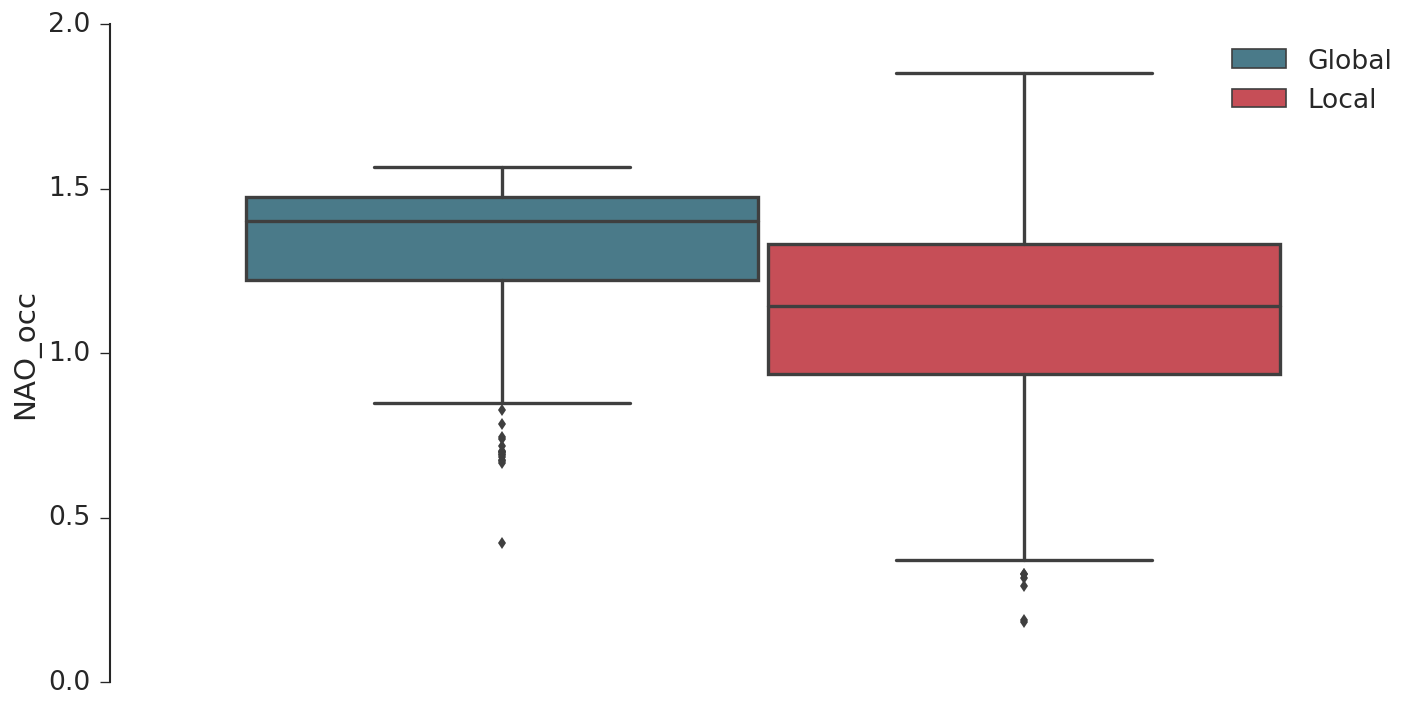

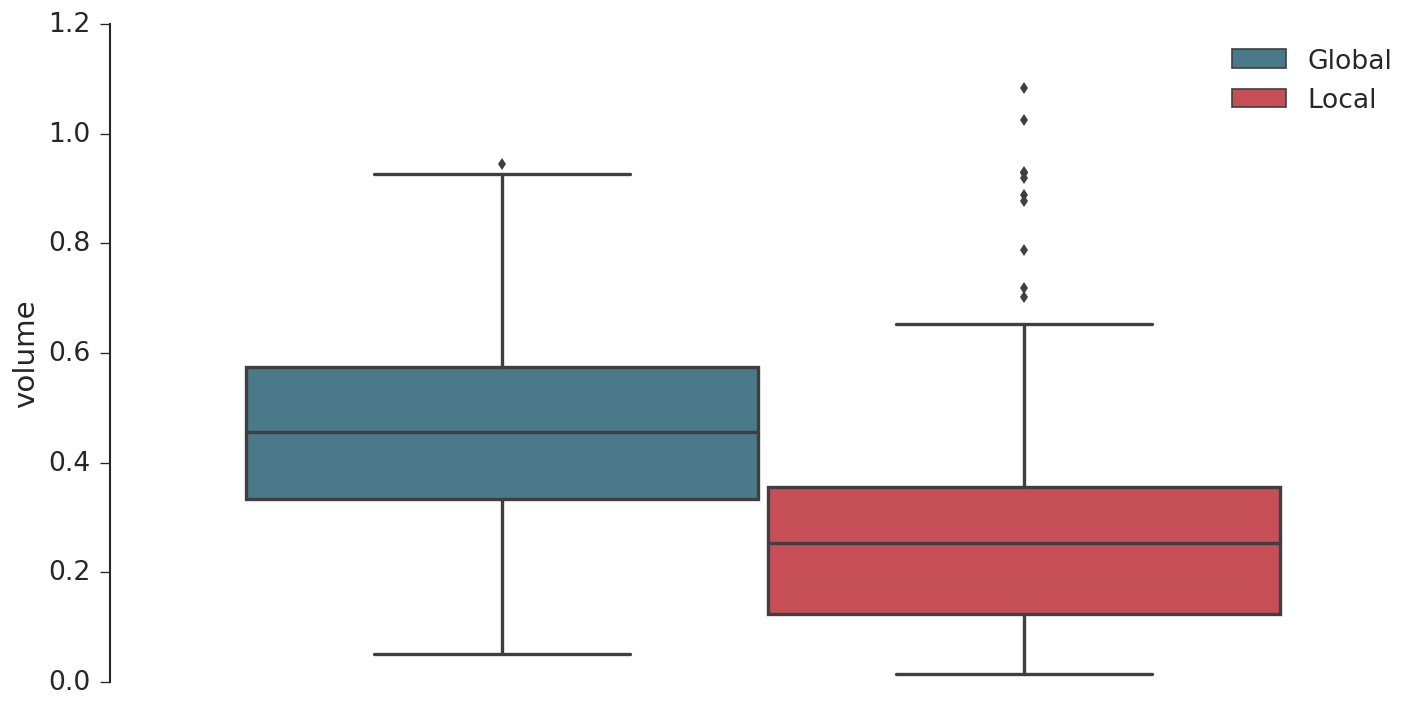

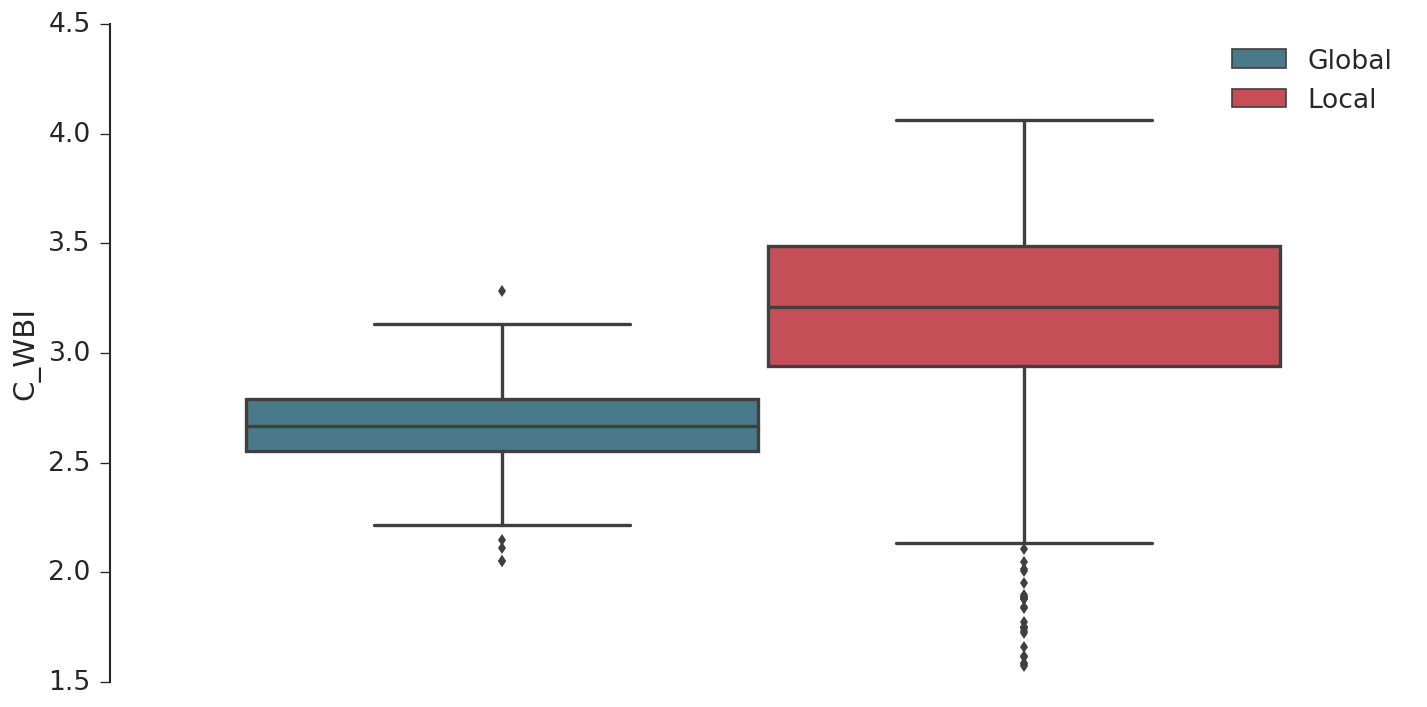

In [191]:
for i in ['gap','q(C)','NAO_occ','volume','C_WBI']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=np.ones(len(df)),y=i,data=df,hue='Type',palette=pal)
    sns.despine(trim=True)
    plt.xticks([], [])
    plt.legend(loc='best')
    save_result('{}_boxplot'.format(i))
    plt.show()

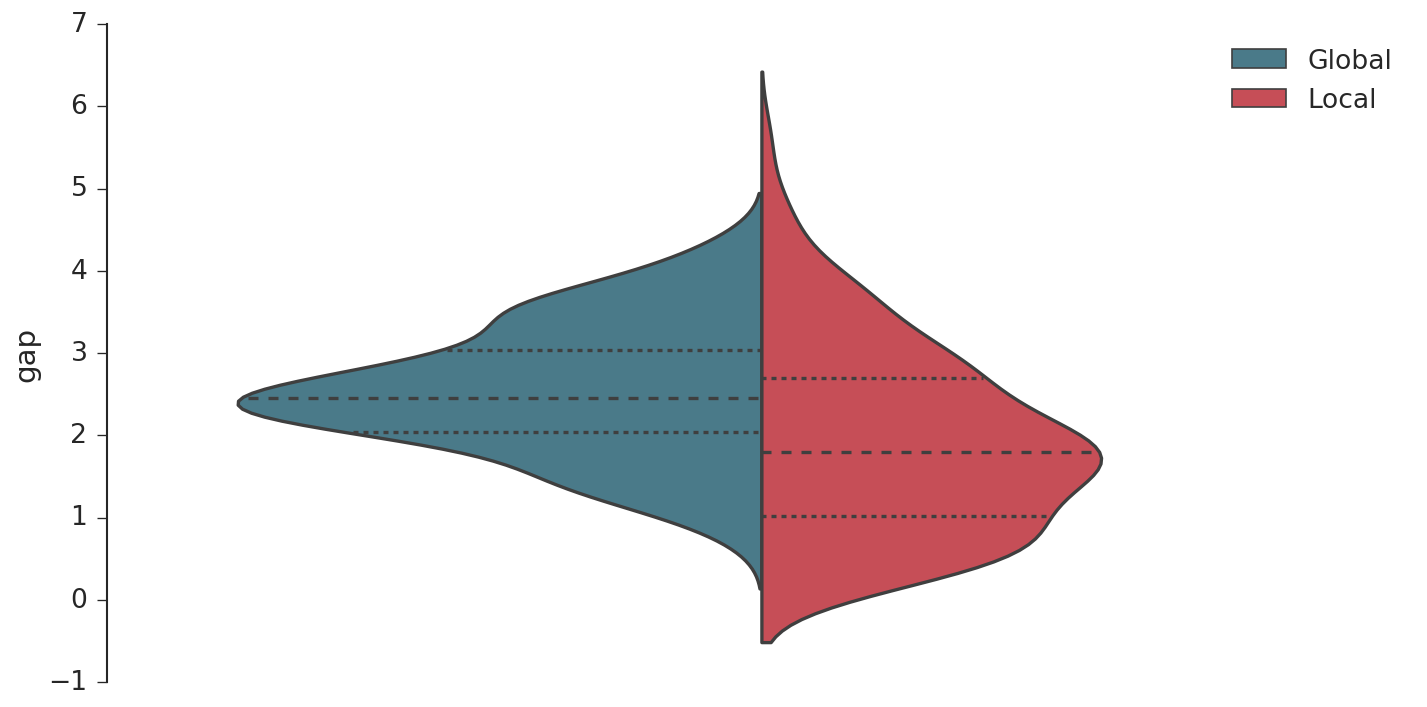

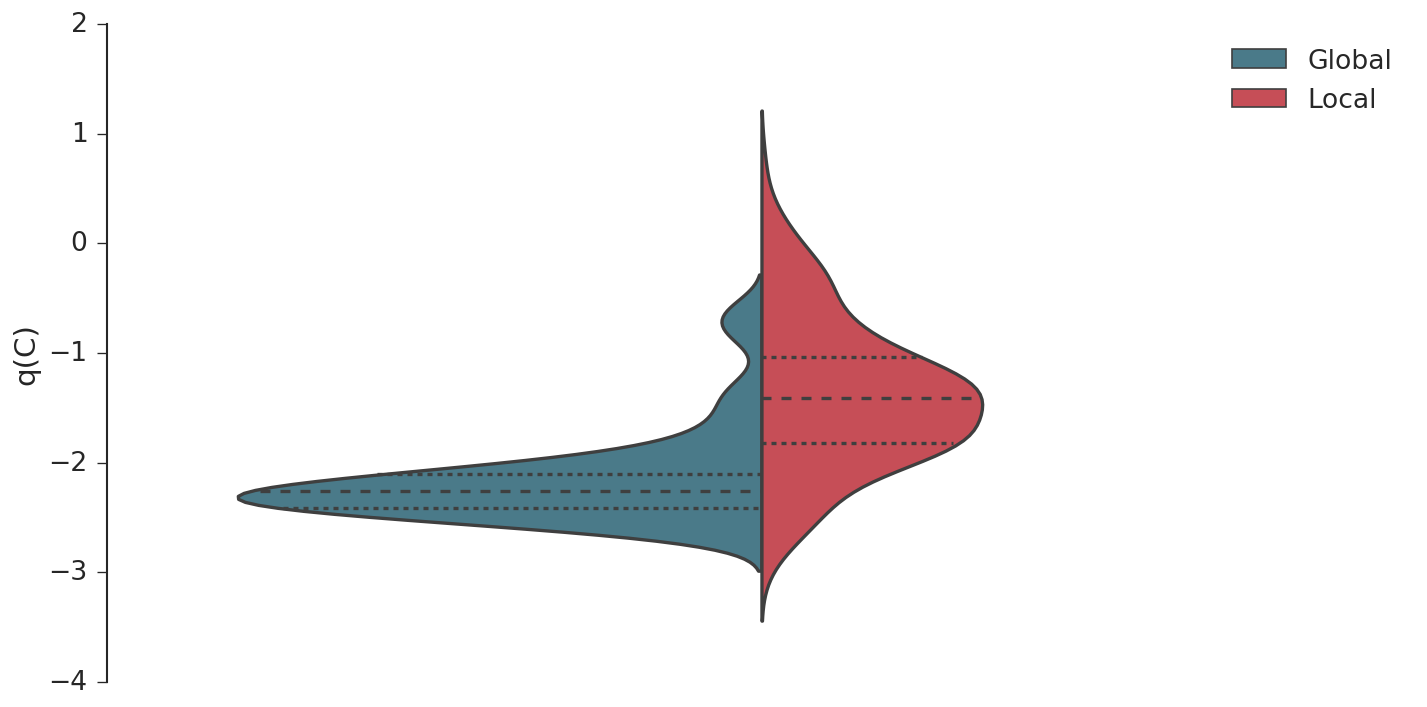

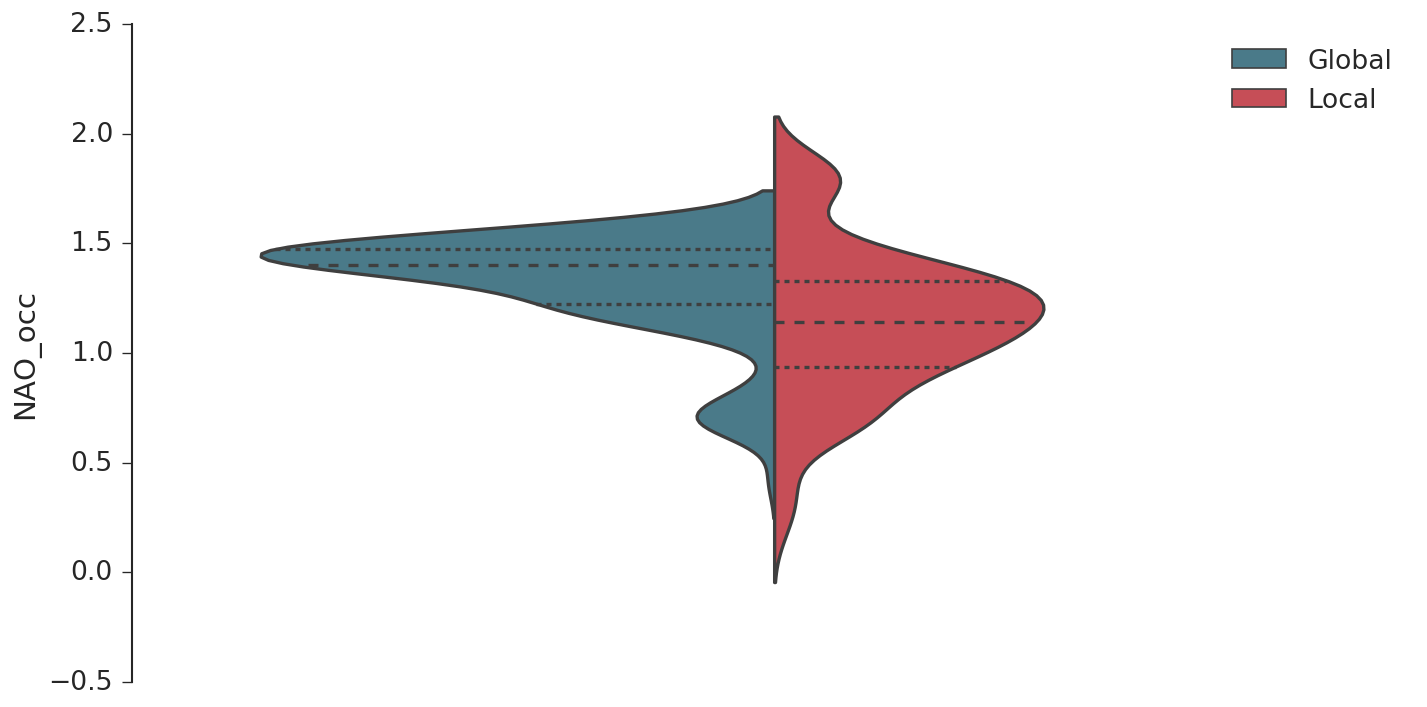

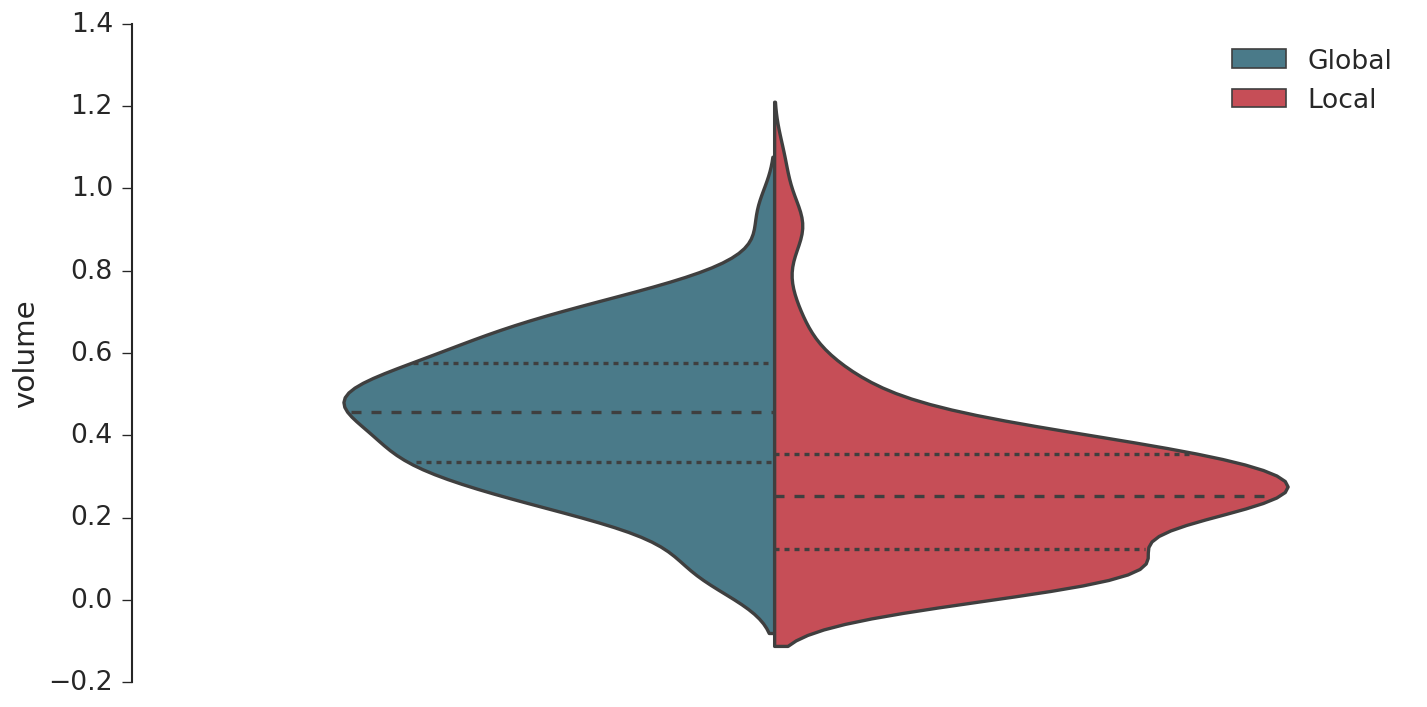

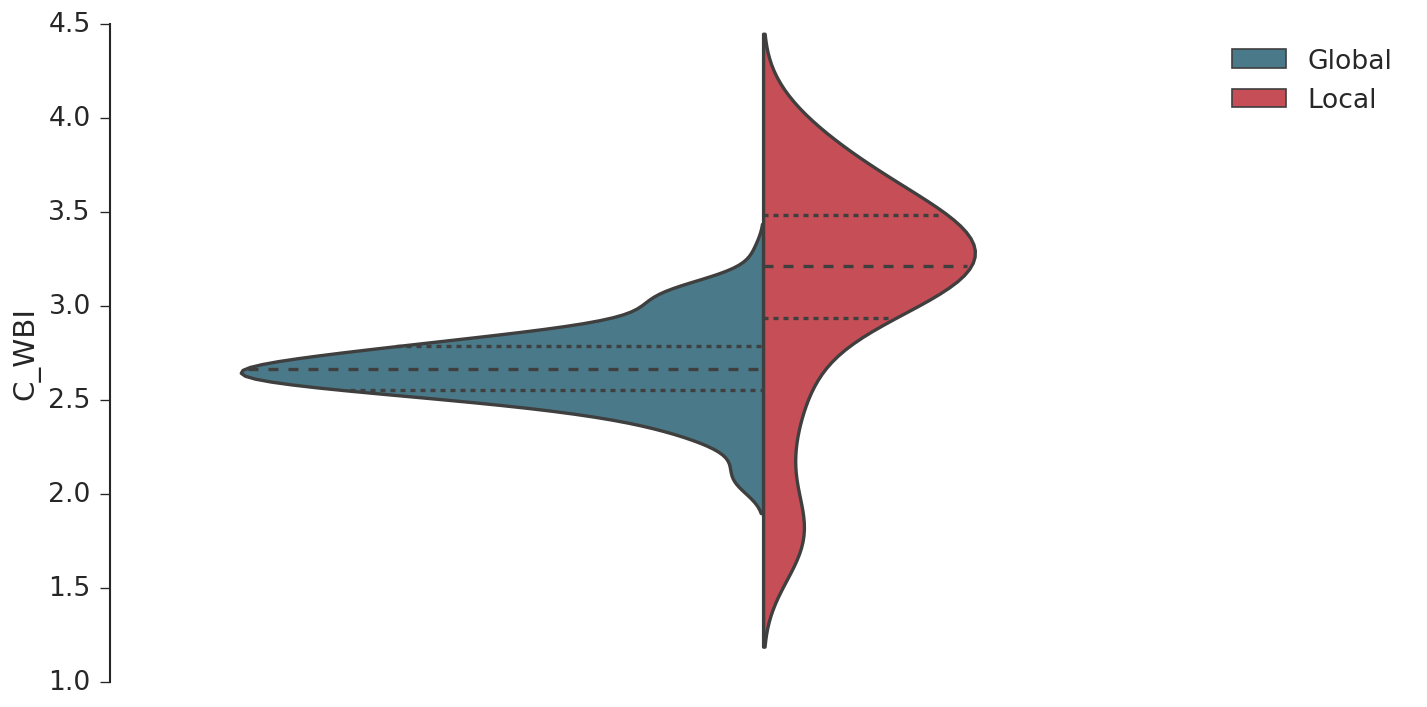

In [192]:
for i in ['gap','q(C)','NAO_occ','volume','C_WBI']:
    plt.figure(figsize=(12,6))
    sns.violinplot(x=np.ones(len(df)),y=i,data=df,hue='Type',palette=pal,
                             split=True,inner="quartile")
    sns.despine(trim=True)
    plt.xticks([], [])
    plt.legend(loc='best')
    save_result('{}_violinplot'.format(i))
    plt.show()

## Data exploration : Pair plots


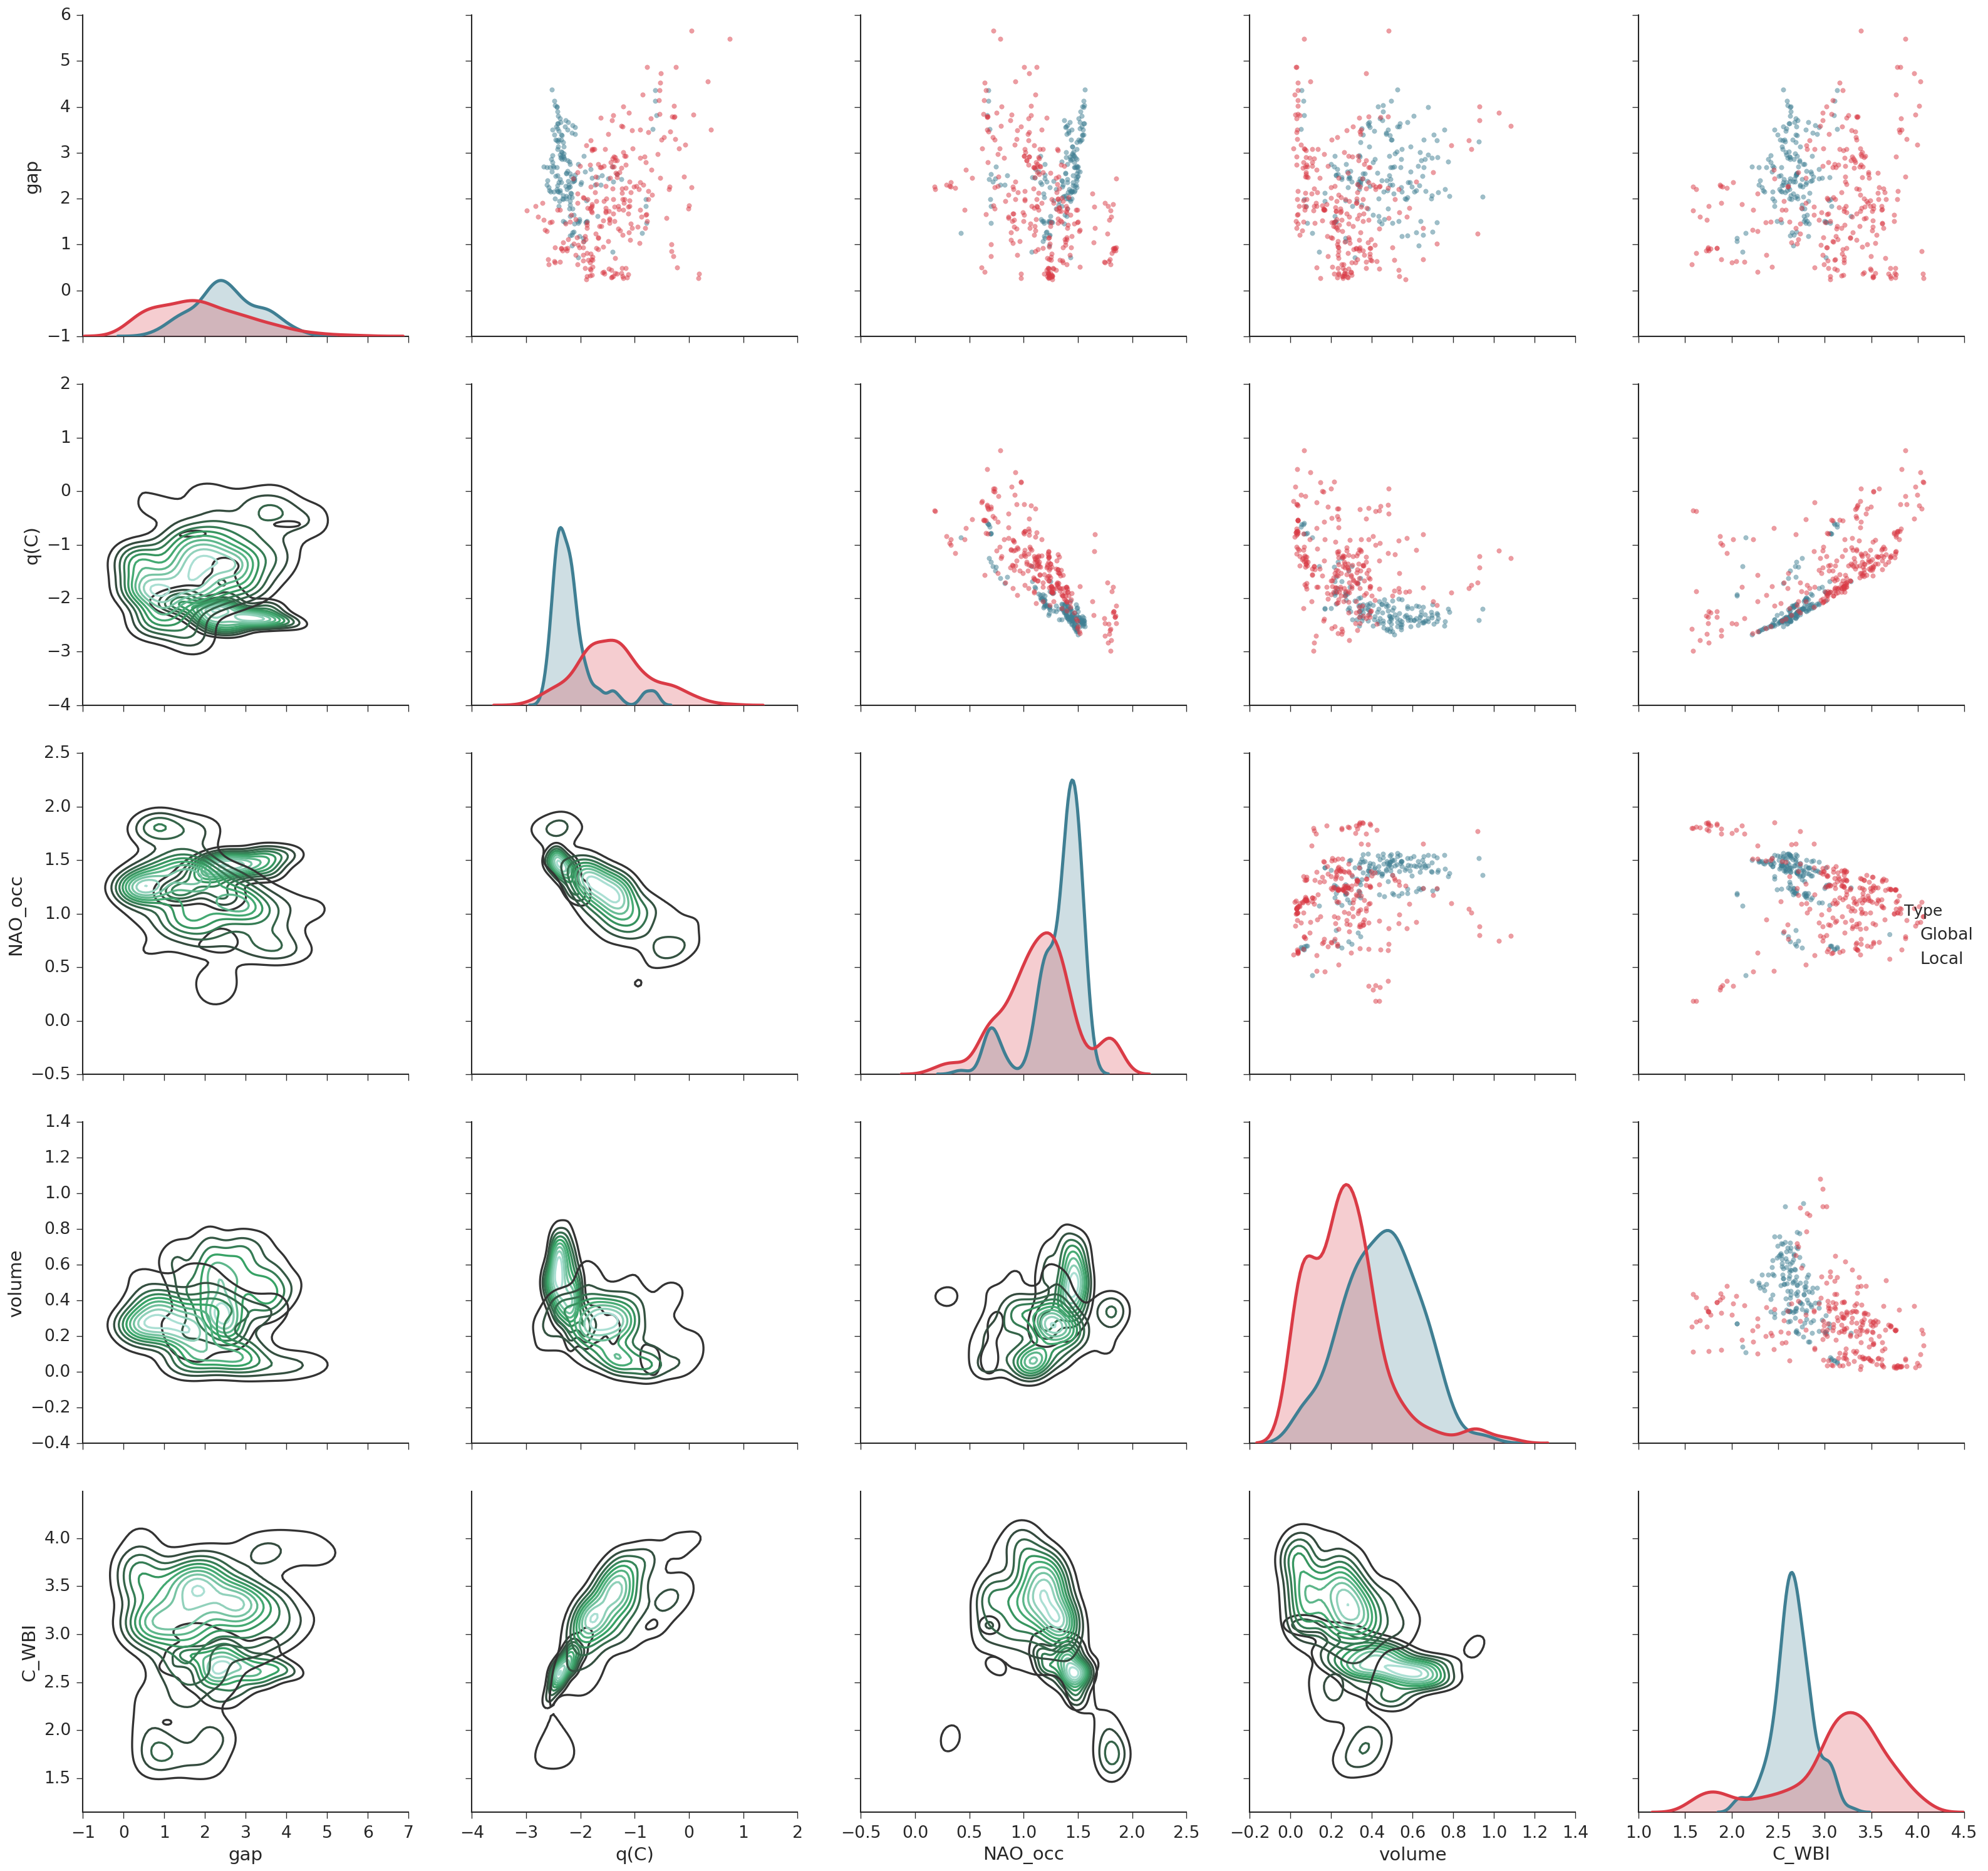

In [92]:
cols=['gap','q(C)','NAO_occ','volume','C_WBI']
g = sns.PairGrid(data=df,hue='Type',
                 palette=pal,
                 vars=cols, size=5)
g = g.map_lower(sns.kdeplot)
g = g.map_upper(plt.scatter,alpha=0.5)
g = g.map_diag(sns.kdeplot,shade=True,lw=3)
g = g.add_legend()
save_result('scalar_pairgrid')
plt.show()

# Preprocess data and test classifiers

## Define all classfiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier

names = ["Nearest Neighbors", "LogisticRegression",
         "Linear SVM", "RBF SVM", "Decision Tree",
         "GP Classifier",'Neural Net',
         "Random Forest","ExtraTrees", "AdaBoost",'GBD',
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(n_neighbors=n_class),
    LogisticRegression(C=1e5),
    SVC(kernel="linear"),
    SVC(),
    DecisionTreeClassifier(),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    MLPClassifier(alpha=1),
    RandomForestClassifier(n_estimators=50),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

## Scenario 1: Only scalar valued features

X shape:  (401, 5)
y shape:  (401,)
Global:  156
Local :  245
Features: gap, q(C), NAO_occ, volume, C_WBI
== Classifier performance ==
           Algorithm -- Mean (  Std)
   Nearest Neighbors = 0.885 (0.073)
  LogisticRegression = 0.856 (0.090)
          Linear SVM = 0.855 (0.101)
             RBF SVM = 0.883 (0.078)
       Decision Tree = 0.886 (0.057)
       GP Classifier = 0.895 (0.074)
          Neural Net = 0.868 (0.088)
       Random Forest = 0.918 (0.061)
          ExtraTrees = 0.932 (0.049)
            AdaBoost = 0.897 (0.078)
                 GBD = 0.901 (0.081)
         Naive Bayes = 0.865 (0.096)
                 LDA = 0.843 (0.102)
                 QDA = 0.885 (0.069)
== Feature Importance ==
        NAO_occ = 9.88 %
         volume = 14.56 %
            gap = 15.62 %
          C_WBI = 23.07 %
           q(C) = 36.87 %


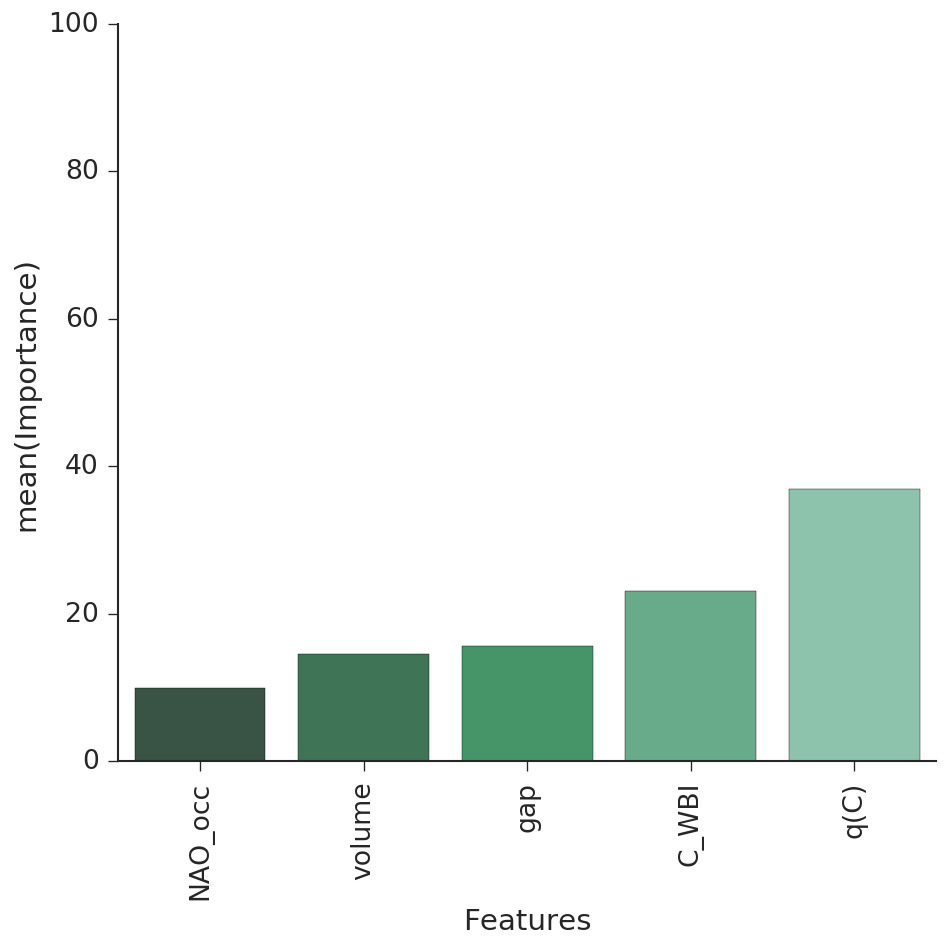

In [193]:
a_df =df.convert_objects(convert_numeric=True)
a_df.dropna(inplace=True)
features =['gap','q(C)','NAO_occ','volume','C_WBI']
X = a_df[features].values
good_df=a_df[features+['Type']]
# Transformar Y
encoder = preprocessing.LabelEncoder()
encoder.fit(list(set(a_df['Type'])))
y = encoder.transform(a_df['Type'])
n_class = len(set(df['Type']))
# Info - results
plt.figure(figsize=(8,8))
report_classification(X,y,features,names, classifiers)
save_result('test1_feature_importance')


## Test 2: Only categorical features (X,n,Y,m, charge)

X shape:  (401, 5)
y shape:  (401,)
Global:  156
Local :  245
Features: X_c, Y_c, m_c, n_c, charge_c
== Classifier performance ==
           Algorithm -- Mean (  Std)
   Nearest Neighbors = 0.498 (0.086)
  LogisticRegression = 0.620 (0.108)
          Linear SVM = 0.567 (0.091)
             RBF SVM = 0.659 (0.085)
       Decision Tree = 0.583 (0.131)
       GP Classifier = 0.586 (0.104)
          Neural Net = 0.641 (0.119)
       Random Forest = 0.610 (0.119)
          ExtraTrees = 0.572 (0.095)
            AdaBoost = 0.665 (0.087)
                 GBD = 0.680 (0.110)
         Naive Bayes = 0.616 (0.118)
                 LDA = 0.610 (0.118)
                 QDA = 0.623 (0.024)
== Feature Importance ==
            n_c = 3.32 %
            m_c = 5.09 %
       charge_c = 11.25 %
            Y_c = 36.93 %
            X_c = 43.41 %


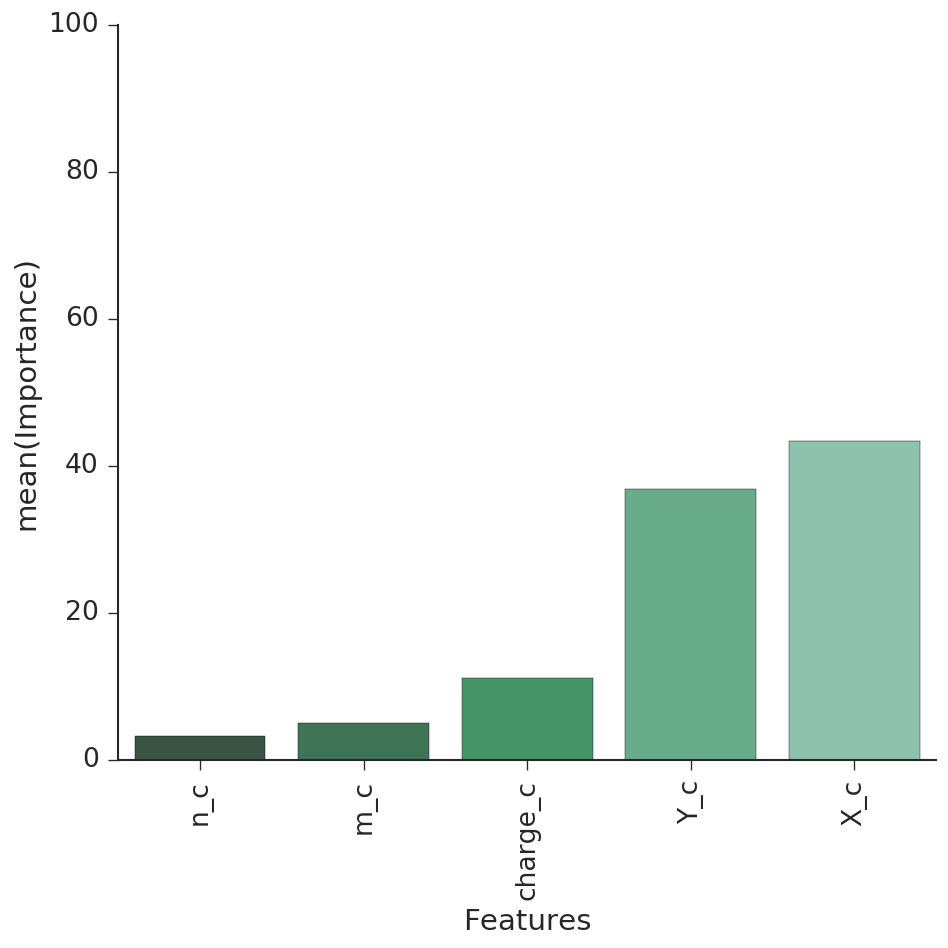

In [79]:
a_df =df.convert_objects(convert_numeric=True)
a_df.dropna(inplace=True)
features =[]
# create class features
cat_features = ['X','Y','m','n','charge']
for c_feature in cat_features:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(list(set(a_df[c_feature])))
    a_df[c_feature+"_c"] = encoder.transform(a_df[c_feature])
    features.append(c_feature+"_c")
    
X = a_df[features].values
good_df=a_df[features+['Type']]

# Transformar Y
encoder = preprocessing.LabelEncoder()
encoder.fit(list(set(a_df['Type'])))
y = encoder.transform(a_df['Type'])
n_class = len(set(df['Type']))
# Info - results
plt.figure(figsize=(8,8))
report_classification(X,y,features,names, classifiers)
save_result('test2_feature_importance')


## Test 3: All features

X shape:  (401, 8)
y shape:  (401,)
Global:  156
Local :  245
Features: gap, q(C), NAO_occ, volume, C_WBI, Xn_c, Ym_c, charge_c
== Classifier performance ==
           Algorithm -- Mean (  Std)
   Nearest Neighbors = 0.523 (0.081)
  LogisticRegression = 0.863 (0.086)
          Linear SVM = 0.855 (0.102)
             RBF SVM = 0.706 (0.134)
       Decision Tree = 0.865 (0.064)
       GP Classifier = 0.775 (0.119)
          Neural Net = 0.645 (0.208)
       Random Forest = 0.910 (0.074)
          ExtraTrees = 0.882 (0.095)
            AdaBoost = 0.835 (0.111)
                 GBD = 0.897 (0.085)
         Naive Bayes = 0.865 (0.090)
                 LDA = 0.840 (0.097)
                 QDA = 0.903 (0.074)
== Feature Importance ==
       charge_c = 2.86 %
           Ym_c = 3.46 %
           Xn_c = 5.28 %
         volume = 8.49 %
            gap = 15.07 %
           q(C) = 17.36 %
        NAO_occ = 18.68 %
          C_WBI = 28.80 %


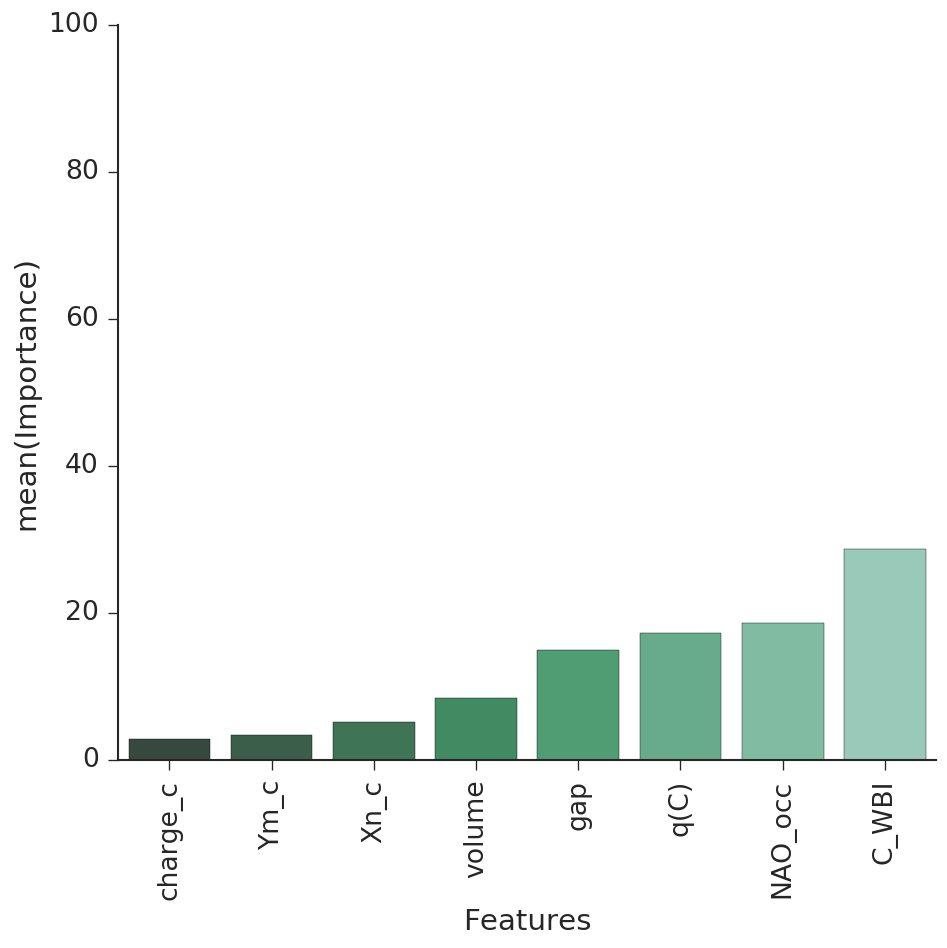

In [84]:
a_df =df.convert_objects(convert_numeric=True)
a_df.dropna(inplace=True)
features =['gap','q(C)','NAO_occ','volume','C_WBI']
# create class features
a_df['Xn'] = a_df['X']+ str(a_df['n'])
a_df['Ym'] = a_df['Y']+ str(a_df['m'])

class_features = ['Xn','Ym','charge']
for c_feature in class_features:
    encoder = preprocessing.LabelEncoder()
    encoder.fit(list(set(a_df[c_feature])))
    a_df[c_feature+"_c"] = encoder.transform(a_df[c_feature])
    features.append(c_feature+"_c")
# data   
X = a_df[features].values
good_df=a_df[features+['Type']]

# Transformar Y
encoder = preprocessing.LabelEncoder()
encoder.fit(list(set(a_df['Type'])))
y = encoder.transform(a_df['Type'])

# Info - results
plt.figure(figsize=(8,8))
report_classification(X,y,features,names, classifiers)
save_result('test3_feature_importance')

## Decision surfaces

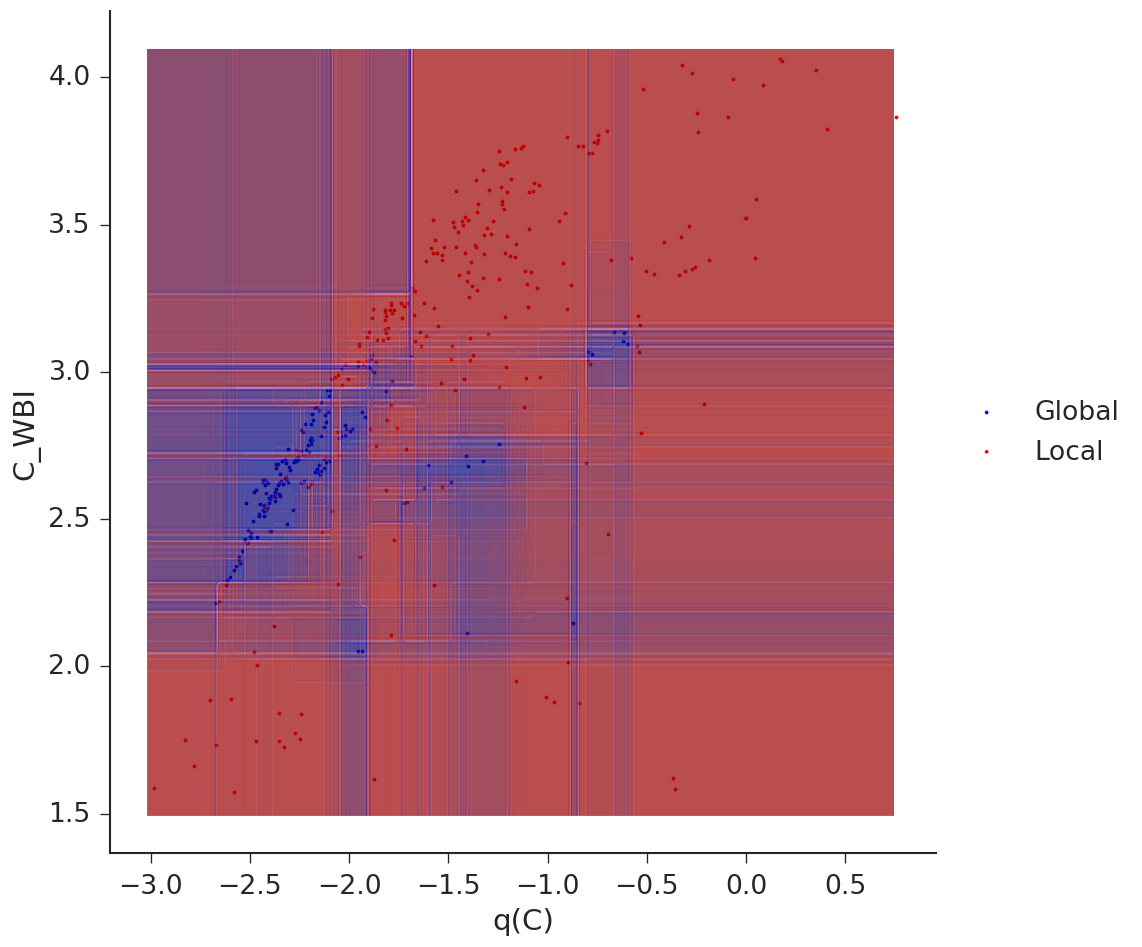

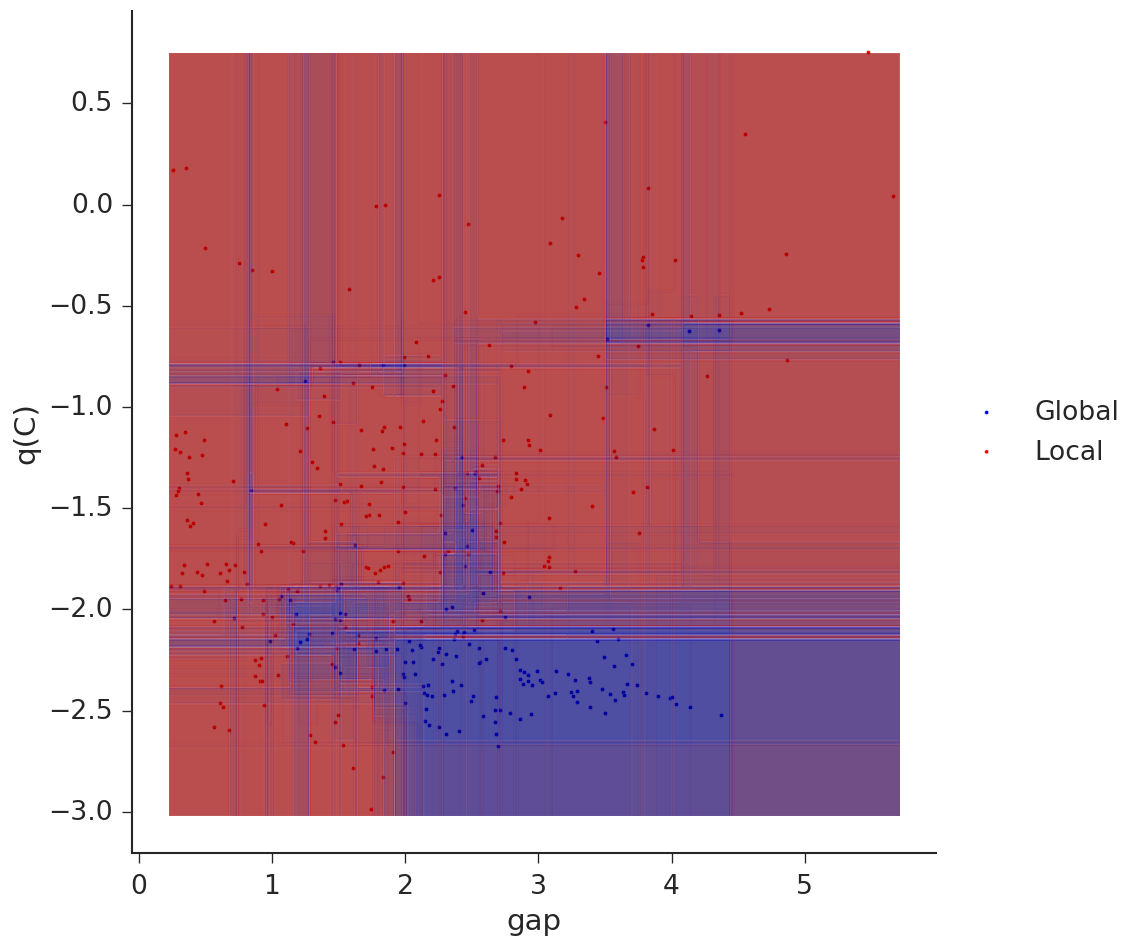

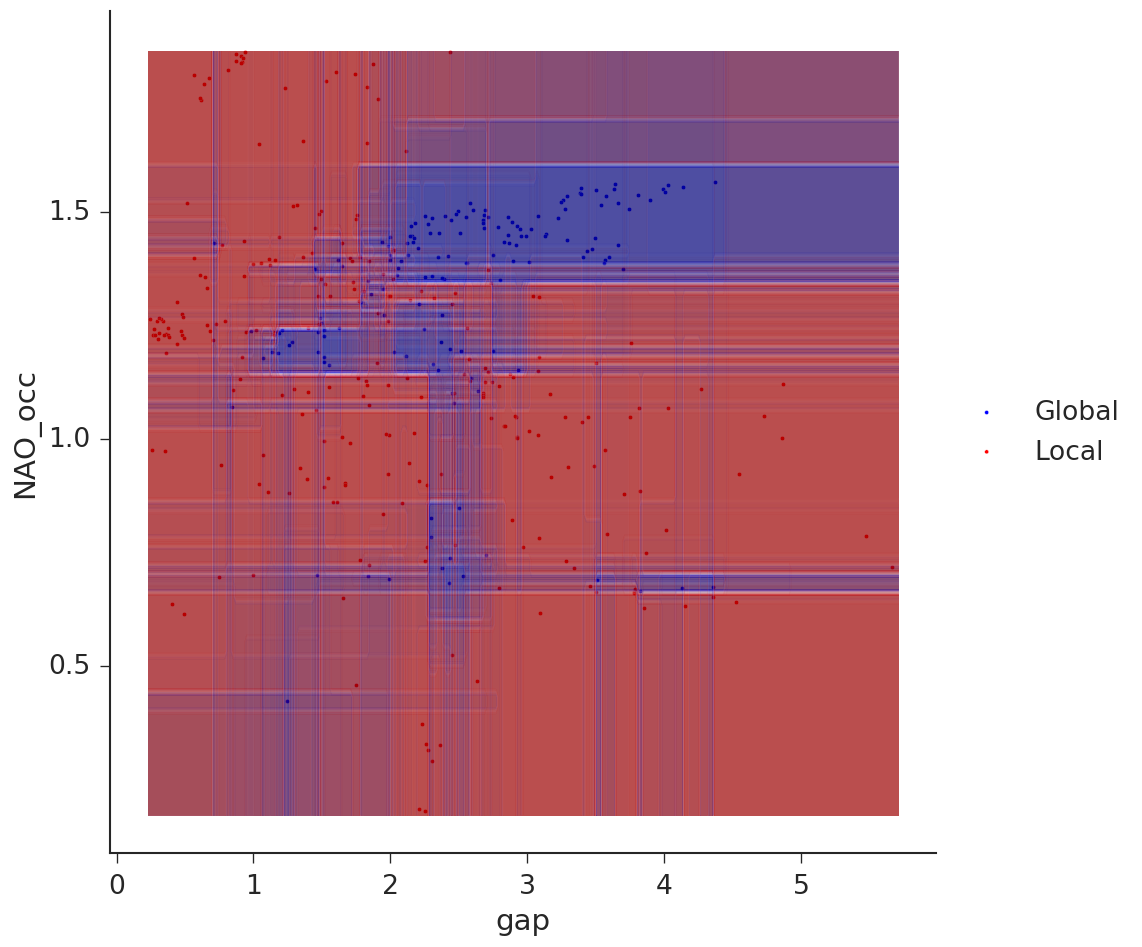

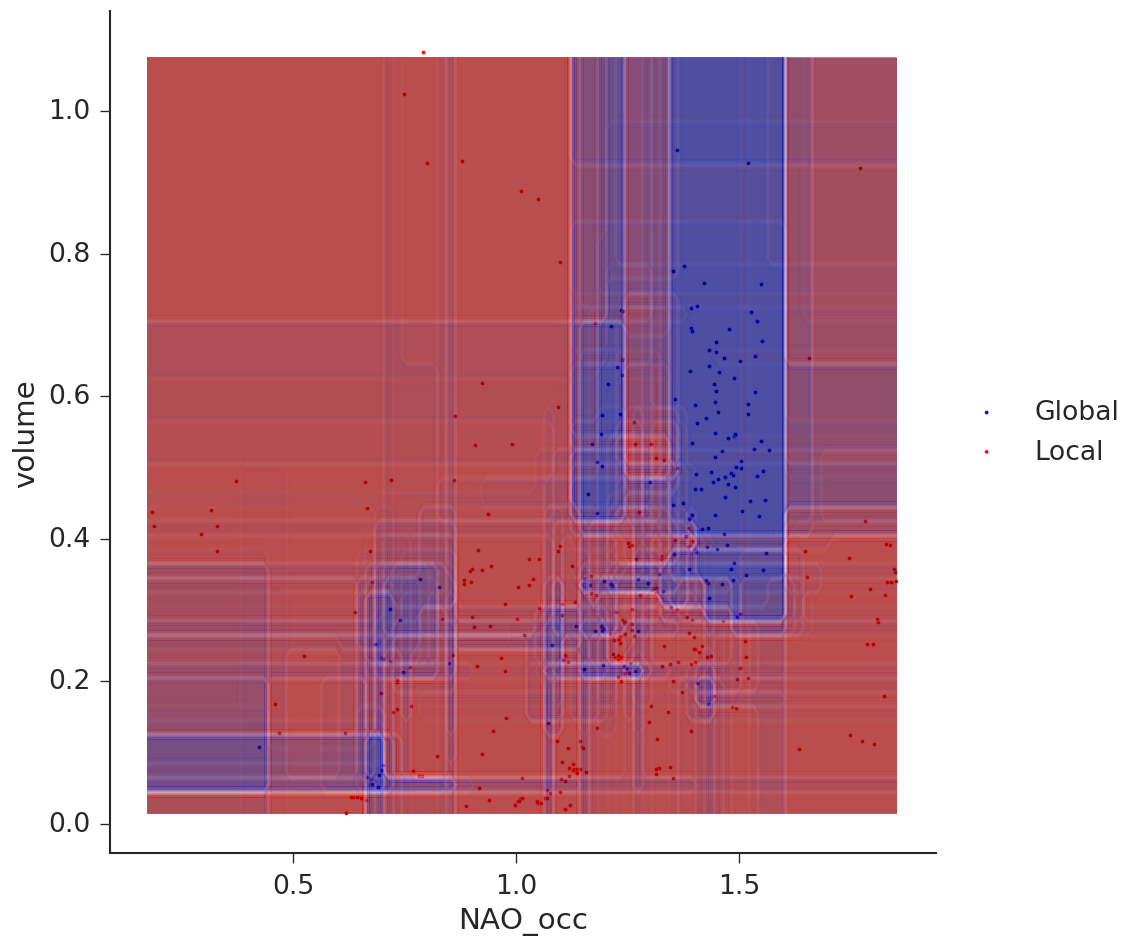

In [197]:
# Parameters
n_estimators = 50
target_names =['Global','Local']
plot_step = 0.02  # fine step width for decision surface contours
n_classes = 2
n_estimators = 30
plot_colors = "br"
cmap = plt.cm.seismic
model = RandomForestClassifier(n_estimators=n_estimators)

# Load data
for pair in ([1,4],[0, 1], [0, 2], [2, 3]):
    plt.figure(figsize=(8,8))
    X_sub = X[:, pair]

    # Train
    clf = sklearn.clone(model)
    clf.fit(X_sub, y)

    # grid space
    x_min, x_max = X_sub[:, 0].min(), X_sub[:, 0].max() 
    y_min, y_max = X_sub[:, 1].min(), X_sub[:, 1].max() 
    x_min = x_min* 0.95 if x_min > 0 else x_min* 1.01
    y_min = y_min* 0.95 if y_min > 0 else y_min* 1.01
    x_max = x_max* 1.01 
    y_max = y_max* 1.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    # alpha
    estimator_alpha = 1.0 / len(clf.estimators_)
    for tree in clf.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs =plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    # Plot the point
    for i, c in zip(range(n_class), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X_sub[idx, 0], X_sub[idx, 1], s=6, c=c,edgecolor='white', label=target_names[i],
                    cmap=cmap,zorder=-1)
    sns.despine()
    plt.xlabel(features[pair[0]])
    plt.ylabel(features[pair[1]])
    plt.tight_layout()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True)
    save_result('{}_{}_surface'.format(features[pair[0]],features[pair[1]]))
    plt.show()